In [51]:
import urllib.request as urlli
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

In [52]:
ChannelId='1840267'
ReadApi='5IPVGMC3PSIVKXX8'
NUM=5000 

In [53]:
url=f'https://api.thingspeak.com/channels/{ChannelId}/feeds.json?api_key={ReadApi}&results={NUM}'
d=pd.read_csv("feeds.csv")
print(d.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  25160 non-null  object 
 1   entry_id    25160 non-null  int64  
 2   field1      25160 non-null  int64  
 3   field2      25160 non-null  int64  
 4   field3      25160 non-null  int64  
 5   field4      25160 non-null  int64  
 6   field5      25160 non-null  float64
 7   field6      25160 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 1.5+ MB
None


<h1>Data Cleaning</h1>  
<h3>Data cleaning means fixing bad data in your data set.</h3>  

Bad data could be:

- Empty cells
- Data in wrong format
- Wrong data
- Duplicates

In [65]:
# Replacing irregular values with the mean of the field
for index,x in d.iterrows():
    if(x['field5']==float("NaN") or x['field5']==' '):
        d[index,'field5']=d['field5'].mean()
    if(x['field6']==float("NaN") or x['field6']==' '):
        d[index,'field6']=d['field6'].mean()
    if(x['field1']==float("NaN") or x['field1']==' '):
        d[index,'field1']=d['field1'].mean()
    if(x['field2']==float("NaN") or x['field2']==' '):
        d[index,'field2']=d['field2'].mean()
    if(x['field3']==float("NaN") or x['field3']==' '):
        d[index,'field3']=d['field3'].mean()
    if(x['field4']==float("NaN") or x['field4']==' '):
        d[index,'field4']=d['field4'].mean()
#removing duplicates
d.drop_duplicates(inplace = True)

In [66]:
temp=[]
hum=[]
co2=[]
voc=[]
pm2=[]
pm10=[]
timestamp=[]
timediff=[]
for index,x in d.iterrows():
    temp.append((float(x['field5'])))
    hum.append(float(x['field6']))
    co2.append(float(x['field1']))
    voc.append(float(x['field2']))
    pm2.append(float(x['field3']))
    pm10.append(float(x['field4']))
    t=x['created_at']
    ti=''
    ti+=t[0:4]+t[5:7]+t[8:10]+t[11:13]+t[14:16]+t[17:19]
    timestamp.append(int(ti))
    if(x['field3']!=x['field4']):
        timediff.append({"time":int(ti), "pm2.5":float(x['field3']), "pm10":float(x['field4'])})
#         print(timediff[len(timediff)-1])
    
print("Start Time(GMT): ", int(timestamp[0]))
print("End Time(GMT): ", int(timestamp[len(timestamp)-1]))
print("Data Size:", len(d))

Start Time(GMT):  20220917170010
End Time(GMT):  20220924035519
Data Size: 25160


# Temperature


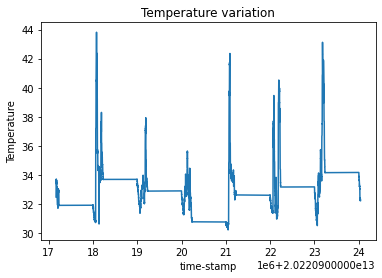

In [67]:
plt.plot(timestamp, temp)
  
plt.xlabel('time-stamp')
plt.ylabel('Temperature')
# giving a title to my graph
plt.title('Temperature variation')
plt.show()

In [68]:
min_temp = min(temp)
max_temp= max(temp)
print(f'We can see that temperature is always in between {min_temp}°C or {(min_temp*9)/5 +32}°F and {max_temp}°C or {(max_temp*9)/5 +32}°F')
print(f'The average value for the curve is {statistics.mean(temp)}')

We can see that temperature is always in between 30.21515°C or 86.38727°F and 43.81247°C or 110.862446°F
The average value for the curve is 33.63761773688394


# Humidity


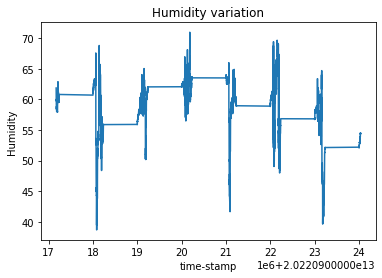

In [69]:
plt.plot(timestamp, hum)
  
plt.xlabel('time-stamp')
plt.ylabel('Humidity')
# giving a title to my graph
plt.title('Humidity variation')
plt.show()

In [70]:
min_hum = min(hum)
max_hum= max(hum)
print(f'We can see that humidity is always in between {min_hum}%  and {max_hum}%')
print(f'The average value for the curve is {statistics.mean(hum)}')

We can see that humidity is always in between 38.6727%  and 70.9646%
The average value for the curve is 58.15800439944356


# CO2


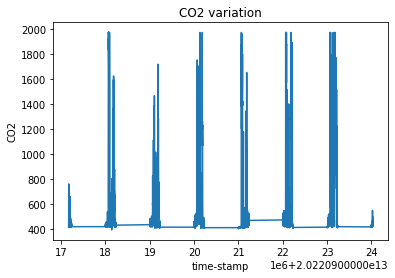

In [71]:
plt.plot(timestamp, co2)
  
plt.xlabel('time-stamp')
plt.ylabel('CO2')
# giving a title to my graph
plt.title('CO2 variation')
plt.show()

In [72]:
min_co2 = min(co2)
max_co2= max(co2)
print(f'We can see that CO2 level is always in between {min_co2}ppm  and {max_co2}ppm')
print(f'The average value for the curve is {statistics.mean(co2)}')

We can see that CO2 level is always in between 394.0ppm  and 1976.0ppm
The average value for the curve is 656.2557233704292


# VOC


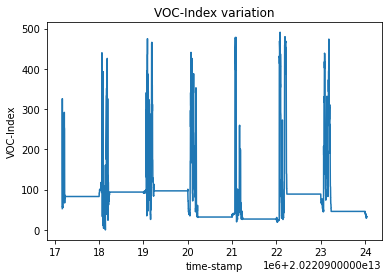

In [73]:
plt.plot(timestamp, voc)
  
plt.xlabel('time-stamp')
plt.ylabel('VOC-Index')
# giving a title to my graph
plt.title('VOC-Index variation')
plt.show()

In [74]:
min_voc = min(voc)
max_voc= max(voc)
print(f'We can see that VOC-Index is always in between {min_voc}  and {max_voc}')
print(f'The average value for the curve is {statistics.mean(voc)}')

We can see that VOC-Index is always in between 0.0  and 491.0
The average value for the curve is 145.77114467408586


# PM2.5 and PM10

Text(0.5, 1.0, 'PM-10')

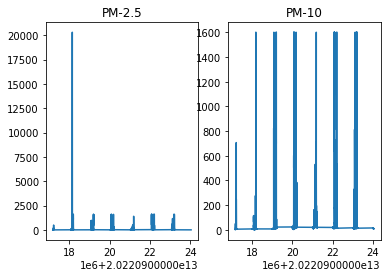

In [75]:
figure, axis = plt.subplots(1, 2)
  
axis[0].plot(timestamp, pm2)
axis[0].set_title("PM-2.5")
  
axis[1].plot(timestamp, pm10)
axis[1].set_title("PM-10")

In [76]:
min_pm = min(pm2)
max_pm= max(pm2)
print(f'We can see that Pm(both pm2 and pm10) level is always in between {min_pm}mg/m3  and {max_pm}mg/m3')
print(f'The average value for the curve is {statistics.mean(pm2)}')

We can see that Pm(both pm2 and pm10) level is always in between 2.0mg/m3  and 20299.0mg/m3
The average value for the curve is 170.11104928457868


# Some Analysis


Text(0.5, 1.0, 'PM-10')

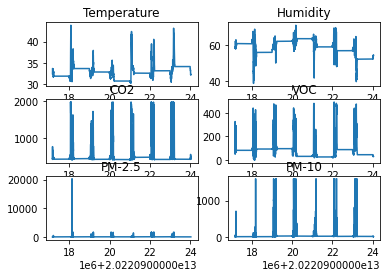

In [77]:
figure, axis = plt.subplots(3, 2)

axis[0,0].plot(timestamp, temp)
axis[0,0].set_title("Temperature")
  
axis[0,1].plot(timestamp, hum)
axis[0,1].set_title("Humidity")

axis[1,0].plot(timestamp, co2)
axis[1,0].set_title("CO2")
  
axis[1,1].plot(timestamp, voc)
axis[1,1].set_title("VOC")

axis[2,0].plot(timestamp, pm2)
axis[2,0].set_title("PM-2.5")
  
axis[2,1].plot(timestamp, pm10)
axis[2,1].set_title("PM-10")

### Some observations:
> On 9th of september there was a heavy rainfall. It is also reflected in our sensors.
>- The temperature dropped by 2-2.5°C.
>- Humidity increased by 7-8% on 9th.
> - The CO2 level is increased rapidly by 1500 ppm, which corressponds with the wikipidea text:  
> <i>Given that water vapor is rarely more than 3% of the atmosphere and only a fraction of that can turn into rain, and the PPM is slightly lower in rain-water than air, that's a pretty slow way of pulling CO2 from the atmosphere. what's more, as rain water evaporates, that CO2 is returned to the atmosphere.</i>
>
